# **Amphibians**

Dataset: Amphibians

Sumber: https://archive.ics.uci.edu/ml/datasets/Amphibians

Dataset Amphibians merupakan dataset yang berisikan informasi tentang hewan amfibi. Dataset ini merupakan masalah klasifikasi multi label yang ditujukan untuk melakukan prediksi terhadap keberadaan jenis hewan amfibi yang hidup di dekat sebuah tandon air. Prediksi dilakukan berdasarkan fitur atau data yang diperoleh dari sistem GIS (Geographic Information System) dan informasi gambar satelit.

- Jenis dataset : Diskrit / Kontinu (harusnya kontinu)
- Jumlah data : 189 Instance
- Jumlah atribut : 16
- Jumlah kelas : 7
- Daftar kelas : Green frogs, Brown frogs, Common toad, Fire-bellied toad, Tree frog, Common newt, dan Great crested newt


# **1. Import Modul dan Get Data**

Mempersiapkan bahan-bahan yang akan digunakan dalam proses Machine Learning, dapat berupa modul dan dataset yang akan diolah

Import library yang dapat membantu dalam proses Machine Learning

In [ ]:
# import module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Unduh dataset yang akan digunakan

In [ ]:
! rm 'dataset.csv'
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/00528/dataset.csv

--2021-05-26 11:02:43--  https://archive.ics.uci.edu/ml/machine-learning-databases/00528/dataset.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10846 (11K) [application/x-httpd-php]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>]  10.59K  --.-KB/s    in 0s      

2021-05-26 11:02:44 (148 MB/s) - ‘dataset.csv’ saved [10846/10846]



Memasukkan dataset ke dalam variabel **df**

In [ ]:
df = pd.read_csv("dataset.csv",delimiter=';', header=1)
df.head()

,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,...,BR,MR,CR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
0,1,A1,600,1,1,4,6,2,10,0,...,0,0,1,0,0,0,0,0,0,0
1,2,A1,700,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
2,3,A1,200,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
3,4,A1,300,1,5,0,6,10,2,3,...,0,0,1,0,0,1,0,0,0,0
4,5,A1,600,2,1,4,10,2,6,0,...,5,0,1,0,1,1,1,0,1,1


# **2. EDA & Preprocessing**

Mendapatkan informasi tentang dataset yang dimiliki dan melakukan preprocessing atau mengolah data mentah agar siap digunakan dalam proses Machine Learning

## 2.1 Get Dataframe Info

Mendapatkan informasi tentang dataset yang dimiliki

Mendapatkan informasi umum dari dataset yang dimiliki

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  189 non-null    int64 
 1   Motorway            189 non-null    object
 2   SR                  189 non-null    int64 
 3   NR                  189 non-null    int64 
 4   TR                  189 non-null    int64 
 5   VR                  189 non-null    int64 
 6   SUR1                189 non-null    int64 
 7   SUR2                189 non-null    int64 
 8   SUR3                189 non-null    int64 
 9   UR                  189 non-null    int64 
 10  FR                  189 non-null    int64 
 11  OR                  189 non-null    int64 
 12  RR                  189 non-null    int64 
 13  BR                  189 non-null    int64 
 14  MR                  189 non-null    int64 
 15  CR                  189 non-null    int64 
 16  Green frogs         189 no

Mendapatkan informasi apakah ada nilai kosong pada baris data

In [ ]:
df.isnull().sum()

ID                    0
Motorway              0
SR                    0
NR                    0
TR                    0
VR                    0
SUR1                  0
SUR2                  0
SUR3                  0
UR                    0
FR                    0
OR                    0
RR                    0
BR                    0
MR                    0
CR                    0
Green frogs           0
Brown frogs           0
Common toad           0
Fire-bellied toad     0
Tree frog             0
Common newt           0
Great crested newt    0
dtype: int64

Dari total 189 baris data dalam Dataframe, diketahui bahwa tidak ada nilai kosong/null

## **2.2 Handle Unwanted Column**

Handle Unwanted Column adalah proses menangani kolom yang tidak diinginkan atau tidak digunakan dalam proses prediksi. Pada percobaan ini, penanganan akan dilakukan dengan menghapus kolom tersebut

Pada dataset ini, kolom ID tidak digunakan karena tidak berhubungan dengan prediksi dan berpotensi mengganggu hasil prediksi

In [ ]:
df.drop(columns = "ID", inplace = True)
df.columns

Index(['Motorway', 'SR', 'NR', 'TR', 'VR', 'SUR1', 'SUR2', 'SUR3', 'UR', 'FR',
       'OR', 'RR', 'BR', 'MR', 'CR', 'Green frogs', 'Brown frogs',
       'Common toad', 'Fire-bellied toad', 'Tree frog', 'Common newt',
       'Great crested newt'],
      dtype='object')

## **2.3 Handle Outliers**



In [ ]:
from collections import Counter

def cari_outlier(df, daftar_fitur):
    indeks_outlier = []
    
    for fitur in daftar_fitur:
        # deklarasi kuartil1 dan kuartil 3
        q1 = np.percentile(df[fitur],25)
        q3 = np.percentile(df[fitur],75)
        
        # Interquartile Range
        iqr = q3 - q1

        # batas minimum dan maximum outlier
        minimum = q1 - (1.5 * iqr)
        maximum = q3 + (1.5 * iqr)

        # deteksi outlier and indeksnya
        daftar_outlier = df[(df[fitur] < minimum) | (df[fitur] > maximum)].index
        
        # menyimpan indeks
        indeks_outlier.extend(daftar_outlier)
    
    indeks_outlier = Counter(indeks_outlier)
    multiple_outliers = list(i for i, v in indeks_outlier.items() if v > 2)
    
    return multiple_outliers

Uji fungsi cari_outlier

In [ ]:
df.loc[cari_outlier(df,["TR","VR","UR","FR","OR","RR","BR","CR"])]

,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,...,BR,MR,CR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt


Tidak ada outlier dalam data

## **2.4 Data Kategorikal**

In [ ]:
np.unique(df['TR'])

array([ 1,  2,  5,  7, 11, 12, 14, 15])

In [ ]:
df['TR'].replace({1:'natural reservoirs', 2:'recently formed', 5:'technological',
                   7:'garden',11:'trenches', 12:'wet meadows', 14:'river valleys',
                   15:'small watercourses'}, inplace=True)

In [ ]:
np.unique(df['VR'])

array([0, 1, 2, 3, 4])

In [ ]:
df['VR'].replace({0:'no vegetation', 1:'patches at the edges', 2:'heavily overgrown',
                   3:'some part devoid of vegetation',4:'reservoirs completely overgrown'}, inplace=True)

In [ ]:
np.unique(df['SUR1'])

array([ 1,  2,  4,  6,  7,  9, 10, 14])

In [ ]:
df['SUR1'].replace({1:'forest areas', 2:'meadows', 4:'gardens',
                   6:'industrial areas',10:'river valleys', 7:'orchards', 9:'roads',
                   14:'agricultural'}, inplace=True)

In [ ]:
np.unique(df['SUR2'])

array([ 1,  2,  6,  7,  9, 10, 11])

In [ ]:
df['SUR2'].replace({1:'forest areas', 2:'meadows',6:'industrial areas',
                     10:'river valleys', 7:'orchards', 9:'roads',
                     11:'agricultural'}, inplace=True)

In [ ]:
np.unique(df['SUR3'])

array([ 1,  2,  5,  6,  7,  9, 10, 11])

In [ ]:
df['SUR3'].replace({1:'forest areas', 2:'meadows', 5:'parks',
                   6:'industrial areas',10:'river valleys', 7:'orchards', 9:'roads',
                   11:'agricultural'}, inplace=True)

In [ ]:
np.unique(df['UR'])

array([0, 1, 3])

In [ ]:
df['UR'].replace({0:'unused', 1:'scenic', 3:'technological'}, inplace=True)

In [ ]:
np.unique(df['FR'])

array([0, 1, 2, 3, 4])

In [ ]:
df['FR'].replace({0:'lack', 1:'intense fishing', 2:'breeding reservoirs',3:'remove',4:'remove'}, inplace=True)

In [ ]:
np.unique(df['OR'])

array([ 25,  50,  75,  80,  99, 100])

In [ ]:
df['OR'].replace({25:'poor access', 50:'low access', 75:'medium access',100:'large access',99:'remove',80:'remove'}, inplace=True)

In [ ]:
np.unique(df['RR'])

array([ 0,  1,  2,  5,  9, 10])

In [ ]:
df['RR'].replace({0:'<50 m', 1:'50-100 m', 2:'100-200 m',5:'200-500 m',9:'500-1000 m',10:'>10000'}, inplace=True)

In [ ]:
np.unique(df['BR'])

In [ ]:
df['BR'].replace({0:'<50 m', 1:'50-100 m', 2:'100-200 m',5:'200-500 m',9:'500-1000 m',10:'>10000'}, inplace=True)

In [ ]:
np.unique(df['MR'])

array([0, 1, 2])

In [ ]:
df['MR'].replace({0:'Clean', 1:'slightly littered', 2:'heavily littered'}, inplace=True)

In [ ]:
np.unique(df['CR'])

array([1, 2])

In [ ]:
df['CR'].replace({1:'Natural', 2:'Concrete'}, inplace=True)

In [ ]:
df

,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,...,BR,MR,CR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
0,A1,600,1,natural reservoirs,reservoirs completely overgrown,industrial areas,meadows,river valleys,unused,lack,...,<50 m,Clean,Natural,0,0,0,0,0,0,0
1,A1,700,1,technological,patches at the edges,river valleys,industrial areas,river valleys,technological,intense fishing,...,50-100 m,Clean,Natural,0,1,1,0,0,1,0
2,A1,200,1,technological,patches at the edges,river valleys,industrial areas,river valleys,technological,remove,...,50-100 m,Clean,Natural,0,1,1,0,0,1,0
3,A1,300,1,technological,no vegetation,industrial areas,river valleys,meadows,technological,remove,...,<50 m,Clean,Natural,0,0,1,0,0,0,0
4,A1,600,2,natural reservoirs,reservoirs completely overgrown,river valleys,meadows,industrial areas,unused,lack,...,200-500 m,Clean,Natural,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,S52,2300,1,wet meadows,some part devoid of vegetation,meadows,meadows,forest areas,unused,lack,...,50-100 m,Clean,Natural,0,1,0,0,0,0,0
185,S52,300,1,river valleys,heavily overgrown,orchards,river valleys,meadows,unused,lack,...,200-500 m,Clean,Natural,1,1,1,1,0,1,0
186,S52,500,1,natural reservoirs,reservoirs completely overgrown,forest areas,river valleys,meadows,unused,lack,...,200-500 m,Clean,Natural,1,1,1,1,0,1,0
187,S52,300,1,wet meadows,some part devoid of vegetation,meadows,forest areas,industrial areas,unused,lack,...,<50 m,Clean,Natural,0,1,1,0,0,0,0


## **2.5 Encoding**

Jadi setiap data kategorikal dijadikan kolom sendiri sendiri

In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.head()

,SR,NR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt,Motorway_A1,...,BR_200-500 m,BR_50-100 m,BR_500-1000 m,BR_<50 m,BR_>10000,MR_Clean,MR_heavily littered,MR_slightly littered,CR_Concrete,CR_Natural
0,600,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1
1,700,1,0,1,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
2,200,1,0,1,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,300,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1
4,600,2,0,1,1,1,0,1,1,1,...,1,0,0,0,0,1,0,0,0,1


## 2.6 Normalisasi Z-Score

Normalisasi adalah suatu proses yang bertujuan untuk menormalkan data atau menghasilkan distribusi data yang lebih mudah dibaca dan lebih baik. Normalisasi dapat dilakukan dengan menormalkan rentang fitur atau menormalkan ragam data (simpangan baku / standar deviasi). Metode normalisasi yang digunakan untuk dataset kali ini adalah Z-Score dengan menggunakan bantuan modul sklearn (scikit-learn). Normalisasi Z-Score digunakan ntuk menormalkan atau menyamakan ragam data (standar deviasi) yang dimiliki sehingga bernilai 1.

Memisahkan dataset menjadi data numerik, data kategorikal, dan labelnya

In [ ]:
numerikal = df[['SR', 'NR']]
label = df[['Green frogs', 'Brown frogs','Common toad', 'Fire-bellied toad', 'Tree frog', 'Common newt', 'Great crested newt']]
kategorikal = df.drop(['SR', 'NR', 'Green frogs', 'Brown frogs','Common toad', 'Fire-bellied toad', 'Tree frog', 'Common newt', 'Great crested newt'],axis=1)

Cek rentang fitur sebelum dilakukan normalisasi

In [ ]:
numerikal.std()

SR    46256.078309
NR        1.544419
dtype: float64

Normalisasi

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# daftar fitur yang akan dilakukan normalisasi
# numerikal = scaler.fit_transform(numerikal)
numerikal = pd.DataFrame(scaler.fit_transform(numerikal))
numerikal.columns = ['SR', 'NR']

# cek standar deviasi
numerikal.std()

SR    1.002656
NR    1.002656
dtype: float64

Menggabungkan hasil normalisasi

In [ ]:
df_normal = pd.concat([numerikal, kategorikal, label], axis=1, join='inner')
df_normal

,SR,NR,Motorway_A1,Motorway_S52,TR_garden,TR_natural reservoirs,TR_recently formed,TR_river valleys,TR_small watercourses,TR_technological,...,MR_slightly littered,CR_Concrete,CR_Natural,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
0,-0.195806,-0.367544,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,-0.193638,-0.367544,1,0,0,0,0,0,0,1,...,0,0,1,0,1,1,0,0,1,0
2,-0.204477,-0.367544,1,0,0,0,0,0,0,1,...,0,0,1,0,1,1,0,0,1,0
3,-0.202309,-0.367544,1,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
4,-0.195806,0.281669,1,0,0,1,0,0,0,0,...,0,0,1,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,-0.158957,-0.367544,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
185,-0.202309,-0.367544,0,1,0,0,0,1,0,0,...,0,0,1,1,1,1,1,0,1,0
186,-0.197974,-0.367544,0,1,0,1,0,0,0,0,...,0,0,1,1,1,1,1,0,1,0
187,-0.202309,-0.367544,0,1,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0


# **3. Model Selection / Split Data**

Model selection dilakukan dengan membagi dataframe menjadi data_latih dan data_uji (split data). Data latih adalah kumpulan dataframe yang nantinya akan dibuat model untuk proses training. Sedangkan Data uji adalah data yang nantinya akan diprediksi tergolong ke dalam kelas mana untuk evaluasi Machine Learning. Data uji yang akan digunakan adalah 2 sampel pertama masing-masing kelas yang ada, sehingga akan ada 14 data uji nantinya (7 kelas x 2 sampel).

Membuat function split_data untuk melakukan split dataset menjadi data_latih dan data_uji

In [ ]:
from sklearn.model_selection import train_test_split

data_latih, data_uji = train_test_split(df_normal,test_size=0.2,random_state=101)

Cek ukuran data_latih dan data_uji

In [ ]:
print(data_latih.shape)
print(data_uji.shape)

(151, 76)
(38, 76)


Memisahkan label atau kelas dari data uji menjadi variabel tersendiri. Proses ini dilakukan untuk kebutuhan pada proses evaluasi

In [ ]:
# backup data_uji dan data_latih sebelum dipop / dipisahkan label kelasnya
data_latih_full = data_latih.copy()
data_uji_full = data_uji.copy()

print(id(data_latih))
print(id(data_latih_full))
print(id(data_uji))
print(id(data_uji_full))

140400143148304
140400132467792
140400153148240
140400132467856


In [ ]:
label_latih = data_latih[data_latih.columns[-7:]]
label_uji = data_uji[data_uji.columns[-7:]]

print(label_latih.shape)
print(label_uji.shape)

(151, 7)
(38, 7)


In [ ]:
data_latih.drop(columns = data_latih.columns[-7:], inplace = True)
data_uji.drop(columns = data_uji.columns[-7:], inplace = True)

print(data_latih.shape)
print(data_uji.shape)

(151, 69)
(38, 69)
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# **Modelling, Prediction, and Classification Report**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

daftar_kelas = label_latih.columns

# models = []
# models.append(('NB', GaussianNB()))
# models.append(('DT', DecisionTreeClassifier()))
# models.append(('SVM', SVC(gamma='auto')))

## **Naive Bayes**

In [ ]:
prediksi_NB = pd.DataFrame(columns = daftar_kelas)
model_NB = {}

#pakai Gaussian karena data kontinu
for kelas in daftar_kelas:
    model_NB[kelas] = GaussianNB()
    model_NB[kelas].fit(data_latih, label_latih[kelas])
    prediksi_NB[kelas] = model_NB[kelas].predict(data_uji)

In [ ]:
print("Classification Report Naive Bayes")

for kelas in daftar_kelas:
    print(kelas)
    print(classification_report(label_uji[kelas], prediksi_NB[kelas]))

Classification Report Naive Bayes
Green frogs
              precision    recall  f1-score   support

           0       0.43      0.80      0.56        15
           1       0.70      0.30      0.42        23

    accuracy                           0.50        38
   macro avg       0.56      0.55      0.49        38
weighted avg       0.59      0.50      0.48        38

Brown frogs
              precision    recall  f1-score   support

           0       0.23      0.78      0.35         9
           1       0.71      0.17      0.28        29

    accuracy                           0.32        38
   macro avg       0.47      0.48      0.31        38
weighted avg       0.60      0.32      0.29        38

Common toad
              precision    recall  f1-score   support

           0       0.34      0.85      0.49        13
           1       0.67      0.16      0.26        25

    accuracy                           0.39        38
   macro avg       0.51      0.50      0.37        38
weig

In [ ]:
total_accuracy_NB = 0
total_precision_NB = 0
total_recall_NB = 0
total_f1_score_NB = 0

for kelas in daftar_kelas:
    accuracy = f"{round(accuracy_score(label_uji[kelas], prediksi_NB[kelas]), 2)}"
    precision = f"{round(precision_score(label_uji[kelas], prediksi_NB[kelas]), 2)}"
    recall = f"{round(recall_score(label_uji[kelas], prediksi_NB[kelas]), 2)}"
    f1_score = 2*(float(precision)*float(recall))/(float(precision)+float(recall))

    total_accuracy_NB += float(accuracy)
    total_precision_NB += float(precision)
    total_recall_NB += float(recall)
    total_f1_score_NB +=float(f1_score)

avg_accuracy_NB = total_accuracy_NB / len(daftar_kelas)
avg_precision_NB = total_precision_NB / len(daftar_kelas)
avg_recall_NB = total_recall_NB / len(daftar_kelas)
avg_f1_score_NB = total_f1_score_NB / len(daftar_kelas)

print('Accuracy =', avg_accuracy_NB)
print('Precision =', avg_precision_NB)
print('Recall =', avg_recall_NB)
print('F1_Score =', avg_f1_score_NB)

Accuracy = 0.4657142857142857
Precision = 0.4700000000000001
Recall = 0.5642857142857143
F1_Score = 0.38574826564830056


## **Decision Tree**

In [ ]:
prediksi_DT = pd.DataFrame(columns = daftar_kelas)
model_DT = {}

#pakai Gaussian karena data kontinu
for kelas in daftar_kelas:
    model_DT[kelas] = DecisionTreeClassifier()
    model_DT[kelas].fit(data_latih, label_latih[kelas])
    prediksi_DT[kelas] = model_DT[kelas].predict(data_uji)

In [ ]:
print("Classification Report Decision Trees")

for kelas in daftar_kelas:
    print(kelas)
    print(classification_report(label_uji[kelas], prediksi_DT[kelas]))

Classification Report Decision Trees
Green frogs
              precision    recall  f1-score   support

           0       0.69      0.60      0.64        15
           1       0.76      0.83      0.79        23

    accuracy                           0.74        38
   macro avg       0.73      0.71      0.72        38
weighted avg       0.73      0.74      0.73        38

Brown frogs
              precision    recall  f1-score   support

           0       0.43      0.33      0.38         9
           1       0.81      0.86      0.83        29

    accuracy                           0.74        38
   macro avg       0.62      0.60      0.60        38
weighted avg       0.72      0.74      0.72        38

Common toad
              precision    recall  f1-score   support

           0       0.36      0.38      0.37        13
           1       0.67      0.64      0.65        25

    accuracy                           0.55        38
   macro avg       0.51      0.51      0.51        38
w

In [ ]:
total_accuracy_DT = 0
total_precision_DT = 0
total_recall_DT = 0
total_f1_score_DT = 0

for kelas in daftar_kelas:
    accuracy = f"{round(accuracy_score(label_uji[kelas], prediksi_DT[kelas]), 2)}"
    precision = f"{round(precision_score(label_uji[kelas], prediksi_DT[kelas]), 2)}"
    recall = f"{round(recall_score(label_uji[kelas], prediksi_DT[kelas]), 2)}"
    f1_score = 2*(float(precision)*float(recall))/(float(precision)+float(recall))

    total_accuracy_DT += float(accuracy)
    total_precision_DT += float(precision)
    total_recall_DT += float(recall)
    total_f1_score_DT +=float(f1_score)
    
avg_accuracy_DT = total_accuracy_DT / len(daftar_kelas)
avg_precision_DT = total_precision_DT / len(daftar_kelas)
avg_recall_DT = total_recall_DT / len(daftar_kelas)
avg_f1_score_DT = total_f1_score_DT / len(daftar_kelas)

print('Accuracy =', avg_accuracy_DT)
print('Precision =', avg_precision_DT)
print('Recall =', avg_recall_DT)
print('F1_Score =', avg_f1_score_DT)

Accuracy = 0.6942857142857143
Precision = 0.5671428571428572
Recall = 0.6171428571428572
F1_Score = 0.5812548130458912


## **Support Vector Machine**

In [ ]:
prediksi_SVM = pd.DataFrame(columns = daftar_kelas)
model_SVM = {}

#pakai Gaussian karena data kontinu
for kelas in daftar_kelas:
    model_SVM[kelas] = SVC(gamma='auto')
    model_SVM[kelas].fit(data_latih, label_latih[kelas])
    prediksi_SVM[kelas] = model_SVM[kelas].predict(data_uji)

In [ ]:
print("Classification Report Support Vector Machine")

for kelas in daftar_kelas:
    print(kelas)
    print(classification_report(label_uji[kelas], prediksi_SVM[kelas]))

Classification Report Support Vector Machine
Green frogs
              precision    recall  f1-score   support

           0       0.67      0.53      0.59        15
           1       0.73      0.83      0.78        23

    accuracy                           0.71        38
   macro avg       0.70      0.68      0.68        38
weighted avg       0.71      0.71      0.70        38

Brown frogs
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.76      1.00      0.87        29

    accuracy                           0.76        38
   macro avg       0.38      0.50      0.43        38
weighted avg       0.58      0.76      0.66        38

Common toad
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.66      1.00      0.79        25

    accuracy                           0.66        38
   macro avg       0.33      0.50      0.40    

In [ ]:
total_accuracy_SVM = 0
total_precision_SVM = 0
total_recall_SVM = 0
total_f1_score_SVM = 0

for kelas in daftar_kelas:
    accuracy = f"{round(accuracy_score(label_uji[kelas], prediksi_SVM[kelas]), 2)}"
    precision = f"{round(precision_score(label_uji[kelas], prediksi_SVM[kelas]), 2)}"
    recall = f"{round(recall_score(label_uji[kelas], prediksi_SVM[kelas]), 2)}"
    try:
        f1_score = 2*(float(precision)*float(recall))/(float(precision)+float(recall))
    except:
        f1_score = 0

    total_accuracy_SVM += float(accuracy)
    total_precision_SVM += float(precision)
    total_recall_SVM += float(recall)
    total_f1_score_SVM +=float(f1_score)
    
avg_accuracy_SVM = total_accuracy_SVM / len(daftar_kelas)
avg_precision_SVM = total_precision_SVM / len(daftar_kelas)
avg_recall_SVM = total_recall_SVM / len(daftar_kelas)
avg_f1_score_SVM = total_f1_score_SVM / len(daftar_kelas)

print('Accuracy =', avg_accuracy_SVM)
print('Precision =', avg_precision_SVM)
print('Recall =', avg_recall_SVM)
print('F1_Score =', avg_f1_score_SVM)

Accuracy = 0.7285714285714285
Precision = 0.3071428571428571
Recall = 0.4042857142857143
F1_Score = 0.34794456547468594
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

## **Perbandingan Hasil Prediksi Ketiga Algortima Klasifikasi**

In [ ]:
print('Naive Bayes : ')
print('Accuracy =', avg_accuracy_NB)
print('Precision =', avg_precision_NB)
print('Recall =', avg_recall_NB)
print('F1_Score =', avg_f1_score_NB)
print()

print('Decision Trees : ')
print('Accuracy =', avg_accuracy_DT)
print('Precision =', avg_precision_DT)
print('Recall =', avg_recall_DT)
print('F1_Score =', avg_f1_score_DT)
print()

print('Support Vector Machine : ')
print('Accuracy =', avg_accuracy_SVM)
print('Precision =', avg_precision_SVM)
print('Recall =', avg_recall_SVM)
print('F1_Score =', avg_f1_score_SVM)
print()


Naive Bayes : 
Accuracy = 0.4657142857142857
Precision = 0.4700000000000001
Recall = 0.5642857142857143
F1_Score = 0.38574826564830056

Decision Trees : 
Accuracy = 0.6942857142857143
Precision = 0.5671428571428572
Recall = 0.6171428571428572
F1_Score = 0.5812548130458912

Support Vector Machine : 
Accuracy = 0.7285714285714285
Precision = 0.3071428571428571
Recall = 0.4042857142857143
F1_Score = 0.34794456547468594



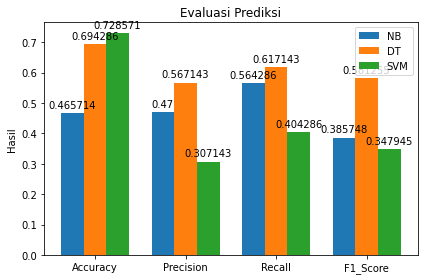

In [ ]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1_Score']
NB = [avg_accuracy_NB, avg_precision_NB, avg_recall_NB, avg_f1_score_NB]
DT = [avg_accuracy_DT, avg_precision_DT, avg_recall_DT, avg_f1_score_DT]
SVM = [avg_accuracy_SVM, avg_precision_SVM, avg_recall_SVM, avg_f1_score_SVM]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, NB, width, label='NB')
rects2 = ax.bar(x, DT, width, label='DT')
rects3 = ax.bar(x + width, SVM, width, label='SVM')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Hasil')
ax.set_title('Evaluasi Prediksi')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6b081d8b-9e75-48e5-98ab-524d0fbce4ad' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>